In [132]:
#Import LIbraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
import plotly.express as px

### Data Exploration

In [133]:
# Load data

df = pd.read_csv("BTC-DATA-FINAL.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [135]:
# convert timestamp to datetime 

df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 296.5 MB


In [137]:
df.shape

(4857377, 8)

### Visualizing the Time Series data

<AxesSubplot:title={'center':'Bitcoin Weighted Price'}, xlabel='Timestamp'>

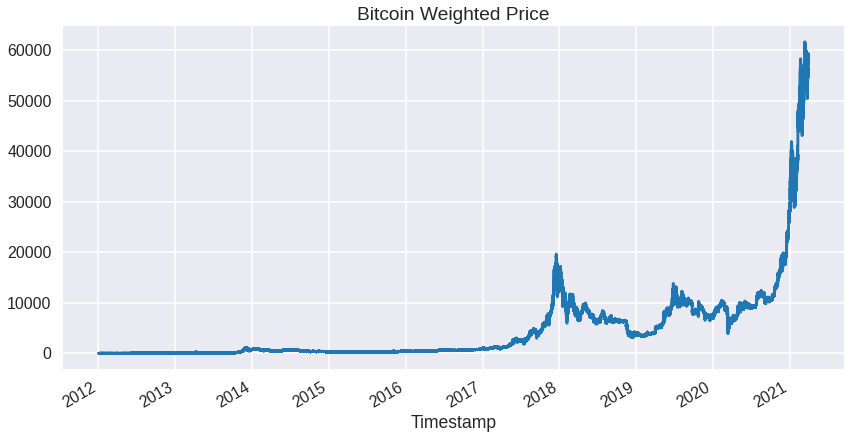

In [138]:
df.set_index('Timestamp').Weighted_Price.plot(figsize=(14,7), title='Bitcoin Weighted Price')

### Missing values treatment

In [139]:
missing_val = df.isnull().sum()
missing_per = (missing_val/df.shape[0])*100
missing_table = pd.concat([missing_val, missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total missing values', 1:'Missing %'}, inplace=True)
missing_table

,Total missing values,Missing %
Timestamp,0,0.00000
Open,1243608,25.60246
High,1243608,25.60246
Low,1243608,25.60246
Close,1243608,25.60246
Volume_(BTC),1243608,25.60246
Volume_(Currency),1243608,25.60246
Weighted_Price,1243608,25.60246


### Imputations Techniques for non Time Series Problems¶
Imputation refers to replacing missing data with substituted values.There are a lot of ways in which the missing values can be imputed depending upon the nature of the problem and data. Dependng upon the nature of the problem, imputation techniques can be broadly they can be classified as follows:

### Basic Imputation Techniques

#### 'ffill' or 'pad' - Replace NaNs with last observed value
#### 'bfill' or 'backfill' - Replace NaNs with next observed value
#### Linear interpolation method

In [140]:
#testing missing value methods on a subset


pd.set_option('display.max_rows', 1500)

a = df.set_index('Timestamp')

a = a['2019-11-01 00:15:00':'2019-11-01 02:24:00']

a['ffill'] = a['Weighted_Price'].fillna(method='ffill') # Imputation using ffill/pad
a['bfill'] = a['Weighted_Price'].fillna(method='bfill') # Imputation using bfill/pad
a['interp'] = a['Weighted_Price'].interpolate()         # Imputation using interpolation

a

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ffill,bfill,interp
Timestamp,,,,,,,,,,
2019-11-01 00:15:00,9245.61,9245.61,9238.70,9238.70,1.303696,1.205250e+04,9244.868342,9244.868342,9244.868342,9244.868342
2019-11-01 00:16:00,9237.75,9249.94,9237.75,9242.09,4.442168,4.107676e+04,9247.007936,9247.007936,9247.007936,9247.007936
2019-11-01 00:17:00,9242.09,9250.73,9242.09,9247.59,0.200352,1.852452e+03,9246.000641,9246.000641,9246.000641,9246.000641
2019-11-01 00:18:00,9247.20,9256.96,9247.20,9256.96,1.254069,1.159798e+04,9248.280434,9248.280434,9248.280434,9248.280434
2019-11-01 00:19:00,9247.34,9257.51,9247.24,9257.48,0.138718,1.283272e+03,9250.925170,9250.925170,9250.925170,9250.925170
2019-11-01 00:20:00,9257.49,9257.49,9247.24,9247.44,0.221101,2.046260e+03,9254.850775,9254.850775,9254.850775,9254.850775
2019-11-01 00:21:00,9247.49,9249.07,9247.24,9247.24,1.063803,9.839155e+03,9249.034498,9249.034498,9249.034498,9249.034498
2019-11-01 00:22:00,9247.27,9254.23,9244.18,9254.00,2.019336,1.868118e+04,9251.149888,9251.149888,9251.149888,9251.149888
2019-11-01 00:23:00,9244.85,9253.95,9243.98,9253.50,1.230669,1.137747e+04,9244.947187,9244.947187,9244.947187,9244.947187


### Imputation using Linear Interpolation method

Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the best possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

Refer to the official documentation for a complete list of interpolation strategies here

In our dataset, we will be performing Linear interpolation on the missing value columns.

In [141]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [142]:
fill_missing(df)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


No Null values in the final output. Now we will move to Exploratory Data Analysis.

First, we will create a copy of the dataset as in the next step we will be setting index as our Timestamp column. Its main advatange is to be able to query the datset fast and also helps in quering and filtering the dataset. Also, a lot of plots require our dataset to be indexed.

In [143]:
#created a copy 
df_non_indexed = df.copy()

In [144]:
df = df.set_index('Timestamp')
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


## EDA

#### Visualizing the weighted price


Text(0, 0.5, 'Weighted Price')

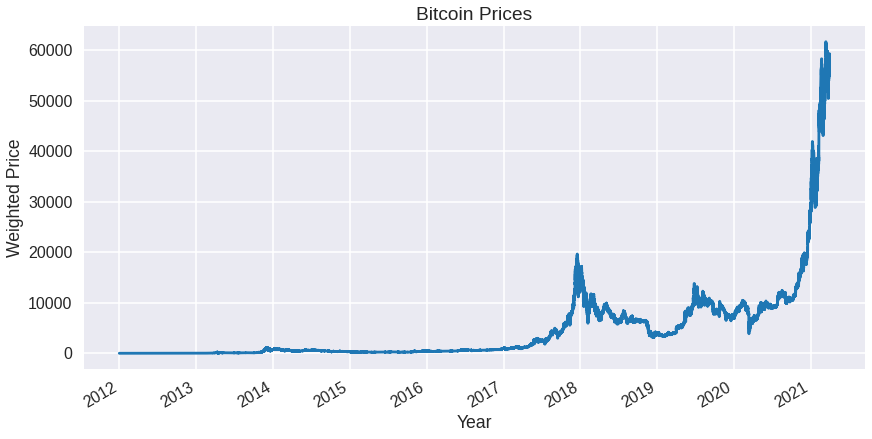

In [145]:
ax = df['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

<AxesSubplot:xlabel='Weighted_Price', ylabel='Density'>

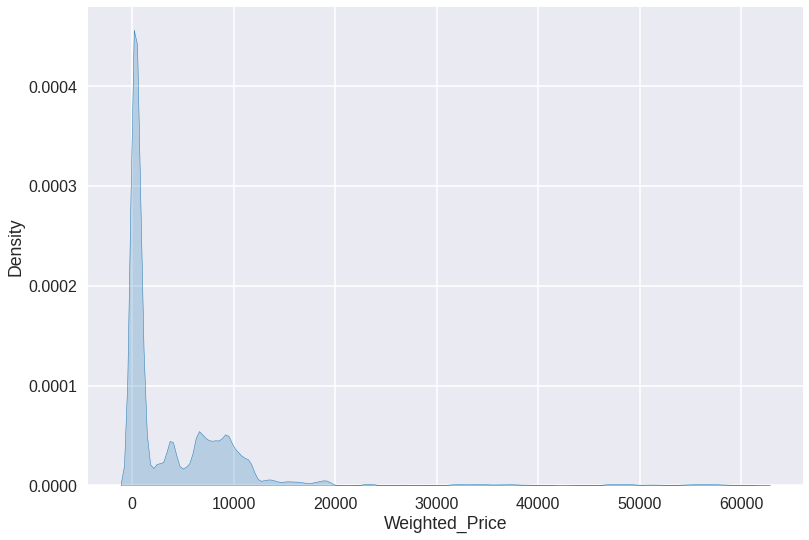

In [105]:
# visualizing using KDE

sns.kdeplot(df['Weighted_Price'], shade=True)

In [ ]:
#Visualising using lag plots

plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(df['Weighted_Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(df['Weighted_Price'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(df['Weighted_Price'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(df['Weighted_Price'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(df['Weighted_Price'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

#### We can see that there is a positive correlation for minute, hour and daily lag plots. We observe absolutely no correlation for month lag plots. It makes sense to re-sample our data atmost at the Daily level, thereby preserving the autocorrelation as well.




### Time Resampling

Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting market trends. To make it easier, we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

The pandas library has a .resample() function which resamples such time series data. The resample method in pandas is similar to its groupby method as it is essentially grouping according to a certain time span. The resample() function looks like this:

In [107]:
hourly_data = df.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:00:00,4.39,4.39,4.39,4.39,2.295689,10.078075,4.39
1,2011-12-31 14:00:00,4.39,4.39,4.39,4.39,7.169489,31.474059,4.39
2,2011-12-31 15:00:00,4.39,4.39,4.39,4.39,13.137408,57.673222,4.39
3,2011-12-31 16:00:00,4.39,4.39,4.39,4.39,19.105327,83.872385,4.39
4,2011-12-31 17:00:00,4.39,4.39,4.39,4.39,25.073246,110.071548,4.39


To summarize what happened above:

data.resample() is used to resample the stock data.
The ‘1H’ stands for hourly frequency, and denotes the offset values by which we want to resample the data.
mean() indicates that we want the average stock price during this period.
The offset values list can be found in the pandas documentation.



In [108]:
df_daily = df.resample("24H").mean() #daily resampling

## Plotting using Plotly¶
Plotly allows us to make interactve charts which are pretty useful in financial analysis.

#### The range-sliders can be used to zoom-in and zoom-out.
#### The range-selectors can be used to select the range.

In [109]:
import plotly.express as px

df_daily.reset_index(inplace=True)
fig = px.line(df_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

## Simple Candlestick Graph

In [110]:
plot_ = df_daily.set_index("Timestamp")["2017-12"]

In [82]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['Open'],
                    high=plot_['High'],
                    low=plot_['Low'],
                    close=plot_['Close']))
fig.show()



## Time Series Decomposition & Statistical Tests
We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual. The seasonal_decompose in statsmodels is used to implements the decomposition.

We will then perform some statistical tests like KPSS and Augmented Dickey–Fuller tests to check stationarity.

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [112]:
#Let's ensure there are no missing values before you perform statistical tests.

fill_missing(df_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
1 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
3 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
4 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

   Volume_(Currency)  Weighted_Price  
0         105.980529        4.424286  
1          27.923145        4.677625  
2          67.432386        4.991701  
3          56.749845        5.175495  
4          43.510443        5.125202  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


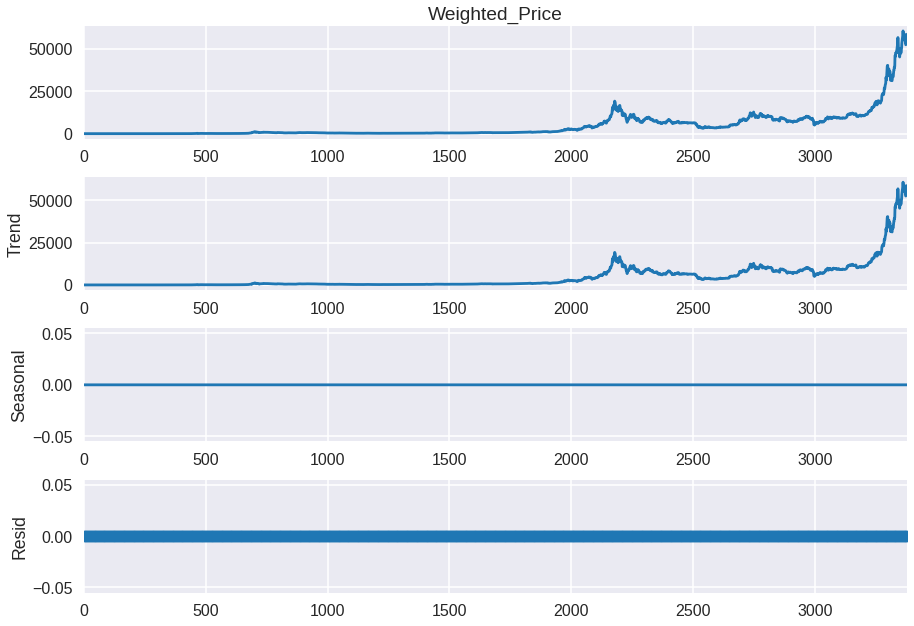

<Figure size 1080x864 with 0 Axes>

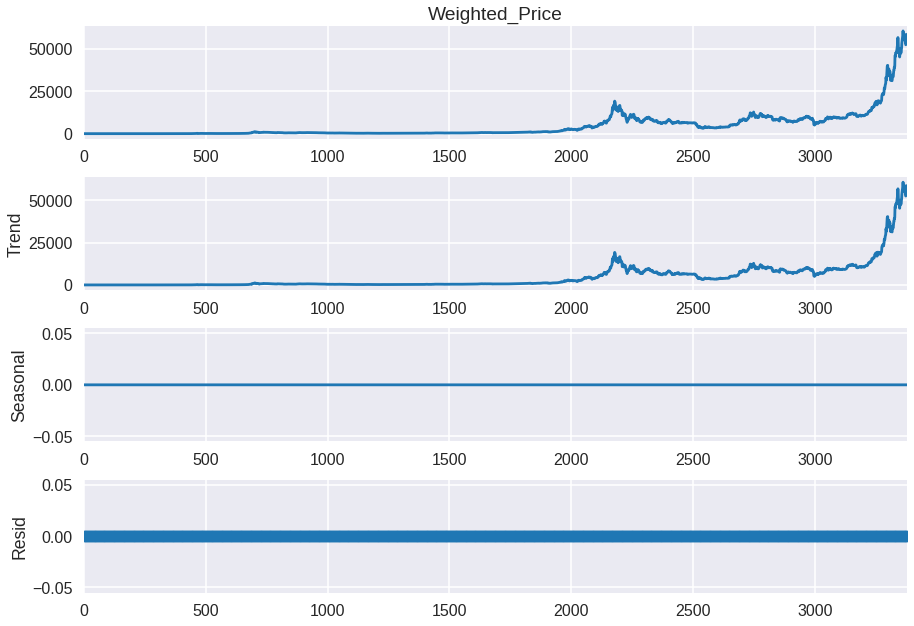

In [113]:
plt.figure(figsize=(15,12))
series = df_daily.Weighted_Price
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

#### Post time series decomposition we don't observe any seasonality. Also, there is no constant mean, variance and covariance, hence the series is Non Stationary. We will perform statistical tests like KPSS and ADF to confirm our understanding. But first, let's plot ACF and PACF graphs.

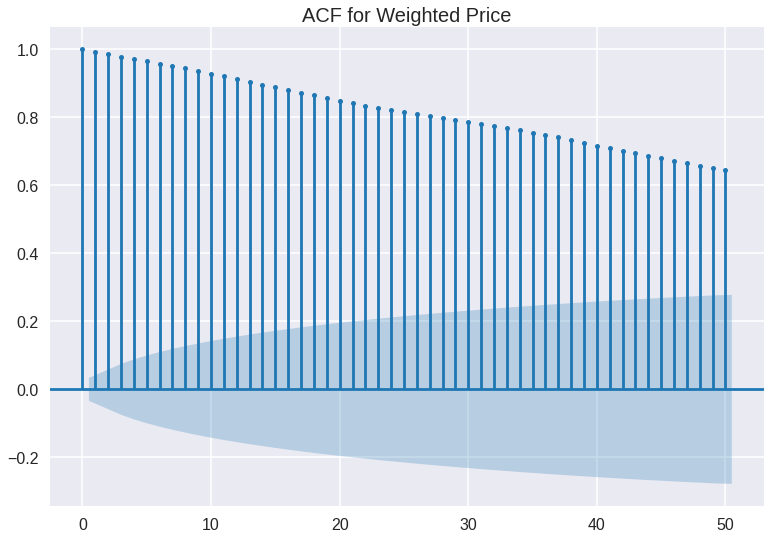

In [114]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Weighted Price", size=20)
plt.show()

The above graph shows that effect barely detoriate over time, so past values affect the present ones. The more lags we include, the better our model will fit the dataset, now the risk is coefficients might predict the dataset too well, cause an overfitting. In our model, we always try to include only those lags which have a direct effect on our present value. Hence, let's try PACF.

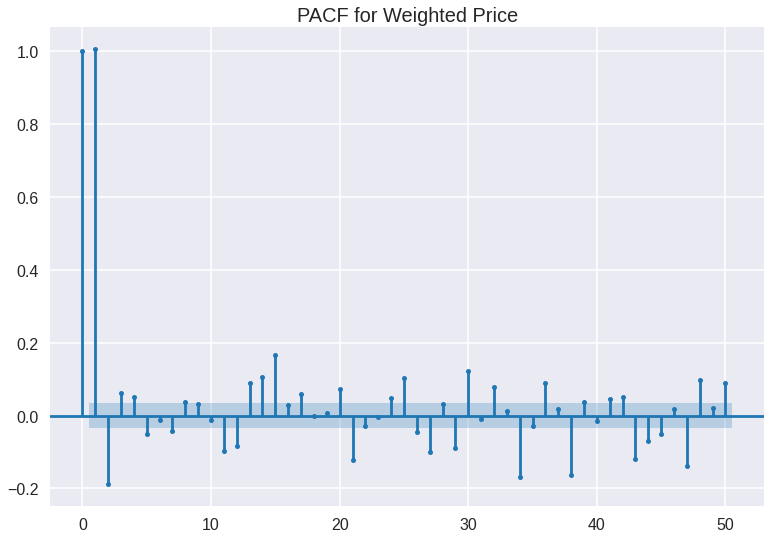

In [115]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Weighted Price", size=20)
plt.show()


Coefficients values for lag>5 are statistically not significant and their impact on the model is minimal, except a few spikes at 8,11,22 and beyond.

### KPSS Test¶
The KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.

Here, the null hypothesis is that the series is stationary.

That is, if p-value is < signif level (say 0.05), then the series is non-stationary and vice versa.

In [116]:
stats, p, lags, critical_values = kpss(series, 'ct')

In [117]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.7963392979047472
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


### Interpreting KPSS test results¶
The output of the KPSS test contains 4 things:

#### The KPSS statistic
#### p-value
#### Number of lags used by the test
#### Critical values

The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

The KPSS statistic is the actual test statistic that is computed while performing the test.

The number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test.

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value. That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

## ADF Test
The only difference here is the Null hypothesis which is just opposite of KPSS.

The null hypothesis of the test is the presence of unit root, that is, the series is non-stationary.

In [118]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [119]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                    6.302121
p-value                           1.000000
#Lags Used                       29.000000
Number of Observations Used    3349.000000
Critical Value (1%)              -3.432304
Critical Value (5%)              -2.862403
Critical Value (10%)             -2.567230
dtype: float64
Series is Stationary


## Conclusion¶
KPSS says series is not stationary and ADF says series is stationary. It means series is difference stationary, we will use differencing to make series stationary.

### Feature Extraction
Rolling windows
Time series data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data.

As we’re looking at daily data, there’s quite a bit of noise present. It would be nice if we could average this out by a week, which is where a rolling mean comes in.

A rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(), etc. For this example, we’ll use a rolling mean for 3, 7 and 30 days.



In [121]:
df1 = df_daily.set_index("Timestamp")

In [122]:
df1.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df1.fillna(df.mean(), inplace=True)

df1.set_index("Timestamp", drop=False, inplace=True)
df1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286,4564.752758,4532.014863,...,4342.158190,112.850620,186.071830,417.775512,9.565484,9.572699,9.590264,3.369452,4.136303,5.128796
2012-01-01,2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625,4.422837,4.422837,...,4.426677,112.850620,186.071830,417.775512,24.024874,24.024874,24.024874,3.369452,4.136303,5.128796
2012-01-02,2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701,4.550231,4.550231,...,4.552151,0.177447,0.177447,0.177447,14.954117,14.954117,14.954117,12.827987,12.827987,12.827987
2012-01-03,2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495,4.697388,4.697388,...,4.698668,0.283099,0.283099,0.283099,14.470437,14.470437,14.470437,9.109362,9.109362,9.109362
2012-01-04,2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202,4.948274,4.816915,...,4.817875,0.251760,0.332071,0.332071,10.174375,13.637000,13.637000,3.899942,7.622256,7.622256


### Benefits :

So, what are the key benefits of calculating a moving average or using this rolling mean method? Our data becomes a lot less noisy and more reflective of the trend than the data itself.

Let's extract time and date features from the Date column.

In [123]:
df1["month"] = df1.Timestamp.dt.month
df1["week"] = df1.Timestamp.dt.week
df1["day"] = df1.Timestamp.dt.day
df1["day_of_week"] = df1.Timestamp.dt.dayofweek
df1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286,4564.752758,4532.014863,...,9.565484,9.572699,9.590264,3.369452,4.136303,5.128796,12,52,31,5
2012-01-01,2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625,4.422837,4.422837,...,24.024874,24.024874,24.024874,3.369452,4.136303,5.128796,1,52,1,6
2012-01-02,2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701,4.550231,4.550231,...,14.954117,14.954117,14.954117,12.827987,12.827987,12.827987,1,1,2,0
2012-01-03,2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495,4.697388,4.697388,...,14.470437,14.470437,14.470437,9.109362,9.109362,9.109362,1,1,3,1
2012-01-04,2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202,4.948274,4.816915,...,10.174375,13.637000,13.637000,3.899942,7.622256,7.622256,1,1,4,2


## Important Note on Cross Validation
To measure the performance of our forecasting model, We typically want to split the time series into a training period and a validation period. This is called fixed partitioning.

If the time series has some seasonality, you generally want to ensure that each period contains a whole number of seasons. For example, one year, or two years, or three years, if the time series has a yearly seasonality. You generally don't want one year and a half, or else some months will be represented more than others.

We'll train our model on the training period, we'll evaluate it on the validation period. Here's where you can experiment to find the right architecture for training. And work on it and your hyper parameters, until you get the desired performance, measured using the validation set. Often, once you've done that, you can retrain using both the training and validation data.And then test on the test(or forecast) period to see if your model will perform just as well.

And if it does, then you could take the unusual step of retraining again, using also the test data. But why would you do that? Well, it's because the test data is the closest data you have to the current point in time. And as such it's often the strongest signal in determining future values. If your model is not trained using that data, too, then it may not be optimal.

Here, we we will opt for a hold-out based validation.

Hold-out is used very frequently with time-series data. In this case, we will select all the data for 2020 as a hold-out and train our model on all the data from 2012 to 2019.

In [ ]:
df_train = df1[df1.Timestamp < "2020"]
df_valid = df1[df1.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

## ARIMA Model
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specic ARIMA model being used.

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of dfferencing.
q: The size of the moving average window, also called the order of moving average.
Happy further reading here

In [124]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 193 kB/s eta 0:00:01    |█████████████████▏              | 8.5 MB 7.2 MB/s eta 0:00:02
     |████████████████████████████████| 9.4 MB 4.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.4.1 requires numpy~=1.19.2, but you'll have numpy 1.21.2 which is incompatible.


In [125]:
import pmdarima as pm

In [126]:
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'month', 'week',
       'day', 'day_of_week']

In [127]:
model = pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Weighted_Price, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

NameError: name 'df_train' is not defined

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))

In [ ]:
model.plot_diagnostics()

The Auto ARIMAX model seems to do a fairly good job in predicting the bitcoin price given data till the previous day. Can other models beat this benchmark?

## Facebook Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

How does Prophet work?
The procedure makes use of a decomposable time series model with three main model components: trend, seasonality, and holidays.

y(t) = g(t) + s(t) + h(t) + e(t)

g(t) trend models non-periodic changes; linear or logistic
s(t) seasonality represents periodic changes; i.e. weekly, monthly, yearly
h(t) ties in effects of holidays; on potentially irregular schedules ≥ 1 day(s)
The error term e(t) represents any idiosyncratic changes which are not accommodated by the model; later we will make the parametric assumption that e(t) is normally distributed. Facebook paper can be referenced for more details here

Let's start modelling!

In [128]:
# Load FB Prophet
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [129]:
!pip install fbprophet

     |████████████████████████████████| 64 kB 383 kB/s eta 0:00:011
     |████████████████████████████████| 47 kB 515 kB/s  eta 0:00:01
     |████████████████████████████████| 142 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 7.8 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement httpstan<4.6,>=4.5 (from pystan>=2.14->fbprophet) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1, 1.1.0, 1.1.1, 1.1.2, 1.1.4, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.1.0, 2.2.0, 2.3.0, 4.0.0, 4.1.0, 4.2.1, 4.3.0, 4.3.1, 4.3.2, 4.4.0, 4.4.1, 4.4.2)
ERROR: No matching distribution found for httpstan<4.6,>=4.5 (from pystan>=2.14->fbprophet)


In [ ]:
# Resampling originial data to day level and forward fill the missing values
daily_data = df.resample("24H").mean() #daily resampling
fill_missing(daily_data)

In [ ]:
# Renaming the column names accroding to Prophet's requirements

daily_data_fb = daily_data.reset_index()[['Timestamp','Weighted_Price']].rename({'Timestamp':'ds','Weighted_Price':'y'}, axis=1)
daily_data_fb.head()

In [ ]:
split_date = "2020-01-01"
train_filt = daily_data_fb['ds'] <= split_date
test_filt = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_filt]
test_fb = daily_data_fb[test_filt]

In [ ]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

In [ ]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["Timestamp", "Weighted_Price"] + exogenous_features].rename(columns={"Timestamp": "ds", "Weighted_Price": "y"}))

forecast = model_fbp.predict(df_valid[["Timestamp", "Weighted_Price"] + exogenous_features].rename(columns={"Timestamp": "ds"}))
forecast.head()

### Narrative

#### yhat : the predicted forecast
#### yhat_lower : the lower border of the prediction
#### yhat_upper: the upper border of the prediction

In [ ]:
df_valid["Forecast_Prophet"] = forecast.yhat.values

In [ ]:
# Plot Our Predictions
fig1 = model_fbp.plot(forecast)

## Narrative

#### Black dots : the actual data points in our dataset.
#### Deep blue line : the predicted forecast/the predicted values
#### Light blue line : the boundaries

In [ ]:
model_fbp.plot_components(forecast)

In [ ]:
# Plotting changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = model_fbp.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_fbp, forecast)

In [ ]:
df_valid[["Weighted_Price", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [ ]:
test_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet'])
test_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet']))

print(f" Prophet's MAE : {test_mae}")
print(f"Prophet's RMSE : {test_rmse}")

## XG BOOST

In [130]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

from datetime import datetime

ModuleNotFoundError: No module named 'xgboost'

In [131]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 3.1 kB/s eta 0:00:01    |████▏                           | 22.0 MB 5.8 MB/s eta 0:00:25     |██████████████▎                 | 74.6 MB 4.5 MB/s eta 0:00:21     |██████████████████████▌         | 117.3 MB 6.4 MB/s eta 0:00:08     |████████████████████████████████| 166.5 MB 4.0 MB/s eta 0:00:01


Here, we we will opt for a hold-out based validation.

Hold-out is used very frequently with time-series data. In this case, we will select all the data for 2020 as a hold-out and train our model on all the data from 2012 to 2019.

In [ ]:
X_train, y_train = df_train[exogenous_features], df_train.Weighted_Price
X_test, y_test = df_valid[exogenous_features], df_valid.Weighted_Price

In [ ]:
reg = xgb.XGBRegressor()

In [ ]:
## Hyper Parameter Optimization Grid

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [ ]:
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

In [ ]:
model.best_estimator_

In [ ]:
df_train['Predicted_Weighted_Price'] = model.predict(X_train)

df_train[['Weighted_Price','Predicted_Weighted_Price']].plot(figsize=(15, 5))

In [ ]:
df_valid['Forecast_XGBoost'] = model.predict(X_test)

overall_data = pd.concat([df_train, df_valid], sort=False)

In [ ]:
overall_data[['Weighted_Price','Forecast_XGBoost']].plot(figsize=(15, 5))

In [ ]:
df_valid[['Weighted_Price','Forecast_XGBoost']].plot(figsize=(15, 5))

## Regression metrics

The sklearn.metrics module implements several loss, score, and utility functions to measure regression performance. We will apply some of them:

Mean absolute error : The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or L1-norm loss.

Mean squared error : The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared error.

R² score, the coefficient of determination : R-squared says how good your model fits the data. R-squared closer to 1.0 says that the model fits the data quite well, whereas closer 0 means that model isn’t that good. R-squared can also be negative when the model just makes absurd predictions.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
train_mae = mean_absolute_error(df_train['Weighted_Price'], df_train['Predicted_Weighted_Price'])
train_rmse = np.sqrt(mean_squared_error(df_train['Weighted_Price'], df_train['Predicted_Weighted_Price']))
train_r2 = r2_score(df_train['Weighted_Price'], df_train['Predicted_Weighted_Price'])

print(f"train MAE : {train_mae}")
print(f"train RMSE : {train_rmse}")
print(f"train R2 : {train_r2}")

In [ ]:
test_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])
test_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost']))
test_r2 = r2_score(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])

print(f"test MAE : {test_mae}")
print(f"test RMSE : {test_rmse}")
print(f"test R2 : {test_r2}")

## Comparing models

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX", "Forecast_Prophet", "Forecast_XGBoost"]].plot(figsize=(14,7))

In [ ]:
arimax_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX']))
fbp_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet']))
xgb_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost']))

arimax_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX'])
fbp_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet'])
xgb_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])


print("ARIMAX RMSE :", arimax_rmse)
print("FB Prophet RMSE :", fbp_rmse)
print("XGBoost RMSE :", xgb_rmse)

print("\nARIMAX MAE :", arimax_mae)
print("FB Prophet MAE :", fbp_mae)
print("XGBoost MAE :", xgb_mae)

## LSTM

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn like RNNs!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

Also, they don't suffer from problems like vanishing/exploding gradient descent.
To master the theory, refer this amazing article here

In [ ]:
price_series = bitstamp_daily.reset_index().Weighted_Price.values
price_series

In [ ]:
price_series.shape

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))


In [ ]:
price_series_scaled, price_series_scaled.shape

In [ ]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [ ]:
test_data

In [ ]:
# train_data = train_data.reshape(-1,1)
# test_data = test_data.reshape(-1,1)

In [ ]:
train_data.shape, test_data.shape

In [ ]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [ ]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape) 
print(X_test.shape)

In [ ]:
print(y_train.shape) 
print(y_test.shape)

In [ ]:
#Create Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.summary()

In [ ]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [ ]:
#Lets do the prediction and performance checking

train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [ ]:

#transformation to original form

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

## Model selection and prediction

We observed remarkable results using LSTMs. They really work a lot better for most sequence tasks!

Let's predict weighted price for next 30 days.

In [ ]:
test_data.shape

In [ ]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape

In [ ]:
x_input

In [ ]:
lookback, len(test_data)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

In [ ]:
len(temp_input)

In [ ]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
len(price_series_scaled)

In [ ]:
df_=price_series_scaled.tolist()
df_.extend(lst_output)
plt.plot(df_)

In [ ]:
plt.figure(figsize=(14,7))
df_invscaled=scaler.inverse_transform(df_).tolist()
plt.plot(df_invscaled)

## Next Steps
We can increase the number of epochs to refine our model performance, you can increase epochs to 100 and can the results. Also, number of lag features can be increased beyond 100 to help learning the model.
I will use LSTM Autoencoders for Anomaly Detection in Time Series.
Please keep an eye on this notebook and Upvote if you learnt something new from this :)